In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetes_df= pd.read_csv('diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [60]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

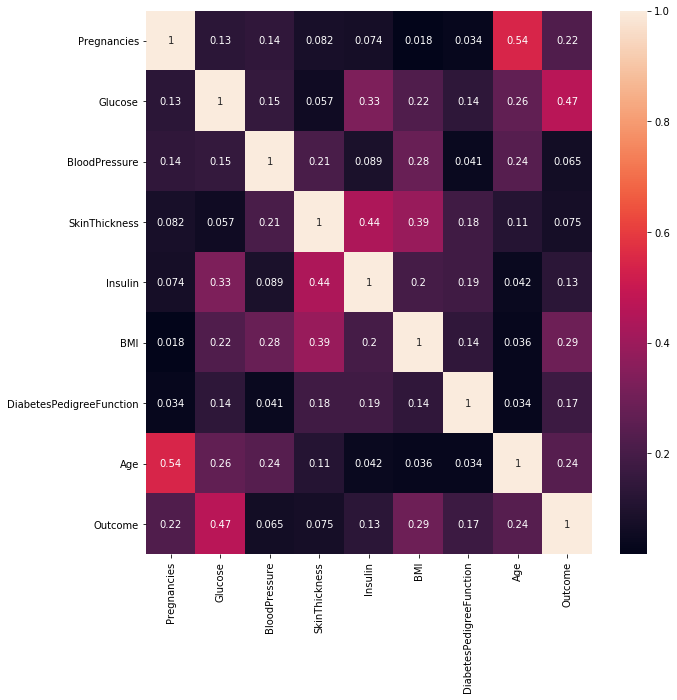

In [19]:
plt.figure(figsize= (10,10))
sns.heatmap(diabetes_df.corr().abs(), annot= True)


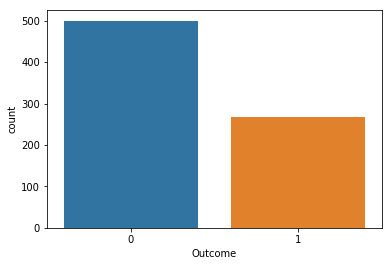

In [29]:
sns.countplot(diabetes_df['Outcome'])

In [20]:
from sklearn.preprocessing import StandardScaler

In [32]:
x= diabetes_df.drop(['Outcome'], axis =1)
y= diabetes_df['Outcome']
std= StandardScaler()
x_std= std.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
x_train, x_test, y_train, y_test= train_test_split(x_std, y, test_size= 0.2, random_state= 73)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [42]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       103
           1       0.77      0.45      0.57        51

   micro avg       0.77      0.77      0.77       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.77      0.77      0.75       154

[[96  7]
 [28 23]]
0.6915096135541595


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV

In [46]:
para= [{'max_depth': np.arange(1,10), 'min_samples_leaf' : np.arange(1,10)}]

In [51]:
dt_grid= GridSearchCV(DT, param_grid= para, cv=5)
dt_grid.fit(x_train, y_train)
y_pred= dt_grid.predict(x_test)

In [52]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       103
           1       0.62      0.65      0.63        51

   micro avg       0.75      0.75      0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.76      0.75      0.75       154

[[83 20]
 [18 33]]
0.7264420331239292


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [57]:
par = [{'n_estimators': np.arange(100, 250)}]
rf_grid= GridSearchCV(rf, param_grid= par, cv= 3)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([100, 101, ..., 248, 249])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
y_pred= rf_grid.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       103
           1       0.76      0.57      0.65        51

   micro avg       0.80      0.80      0.80       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.79      0.80      0.79       154

[[94  9]
 [22 29]]
0.7406244051018466


## SVM

In [61]:
from sklearn.svm import SVC
svm= SVC()

In [62]:
par = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [64]:
svm_grid= GridSearchCV(svm, param_grid= par, cv=3)
svm_grid.fit(x_train, y_train)
y_pred= svm_grid.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       103
           1       0.71      0.43      0.54        51

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.75      0.75      0.73       154

[[94  9]
 [29 22]]
0.6719969541214544


## Best model- RANDOM FOREST